# PCA of EEG Features (Dortmund Dataset)
This notebook describes the process of applying PCA to EEG-derived features, exploring dimensionality reduction, and preparing data for clustering.

- Objective: Reduce high-dimensional EEG features to a lower-dimensional space to explore participant variability.
- Dataset: Dortmund dataset (608 participants, multiple EEG features).
- Goals:
  1. Understand structure of the features.
  2. Perform PCA for dimensionality reduction.
  3. Explore variance explained by principal components.
  4. Prepare data for clustering and visualization.

## Load Data
Load the Dortmund dataset and inspect the first few rows.

In [11]:
import pandas as pd
import numpy as np

dort = pd.read_csv("./dataset/Dortmund_features.csv", index_col=0)  # Keep subject IDs as index!
age_sex_dort = pd.read_csv("./dataset/Dortmund_age&sex.csv", index_col=0)
# Extract age and sex
age_dort = age_sex_dort['age'].values
sex_dort = age_sex_dort['sex'].values

lemon = pd.read_csv("./dataset/Lemon_features.csv", index_col=0)  # Keep subject IDs as index!
age_sex_lemon = pd.read_csv("./dataset/Lemon_age&sex.csv", index_col=0)
# Extract age and sex
age_lemon = age_sex_lemon['age_group'].values # note ages are ranges in Lemon
sex_lemon = age_sex_lemon['sex'].values

## Exploratory Data Analysis
- Preview first few rows and numeric columns.
- Check for missing values.
- Examine feature distributions.

In [12]:
# Print dataset shapes
print(f"Dortmund_features.csv shape: {dort.shape}")
print(f"LEMON_features.csv shape: {lemon.shape}\n")

dort_cols = set(dort.columns)
lemon_cols = set(lemon.columns)

print("Features only in Dortmund:")
print(dort_cols - lemon_cols, "\n")

print("Features only in LEMON:")
print(lemon_cols - dort_cols, "\n")


Dortmund_features.csv shape: (600, 147)
LEMON_features.csv shape: (190, 147)

Features only in Dortmund:
set() 

Features only in LEMON:
set() 



All features are shared in Dortmund and Lemon

1. Scatter Plot of First Two Raw Features


Plotting the first two numeric features:
Feature 1: nl_rqa mean diag length
Feature 2: kurtosis_amp_theta



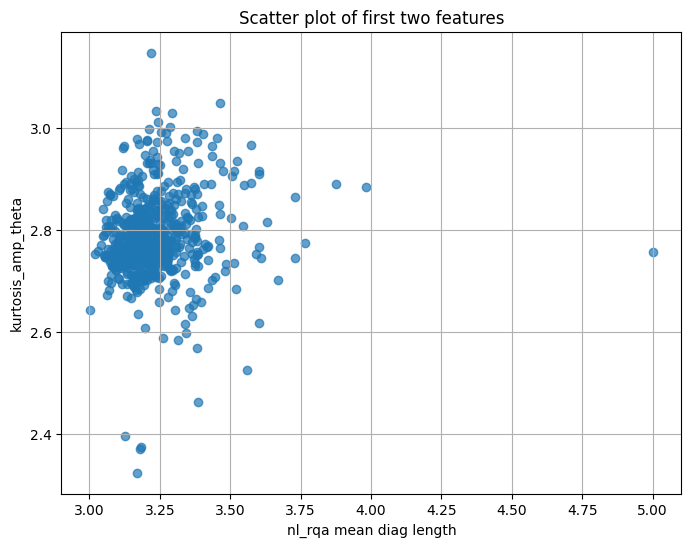

In [13]:
import matplotlib.pyplot as plt

# Select only numeric columns (exclude IDs or non-numeric)
numeric_data = dort.select_dtypes(include=['float64', 'int64'])
dort_numeric = numeric_data.values

# Define features (all numeric columns)
features = dort_numeric  # shape: (participants, features)

# Print what we are plotting
print("Plotting the first two numeric features:")
print(f"Feature 1: {numeric_data.columns[0]}")
print(f"Feature 2: {numeric_data.columns[1]}\n")

# Scatter plot of first two features
plt.figure(figsize=(8,6))
plt.scatter(features[:, 0], features[:, 1], alpha=0.7)
plt.xlabel(numeric_data.columns[0])
plt.ylabel(numeric_data.columns[1])
plt.title("Scatter plot of first two features")
plt.grid(True)
plt.show()


2. Feature-Age/Sex Relationship
-   **Age** — plotted using scatter plots  
-   **Sex** — plotted using boxplots (female vs male)

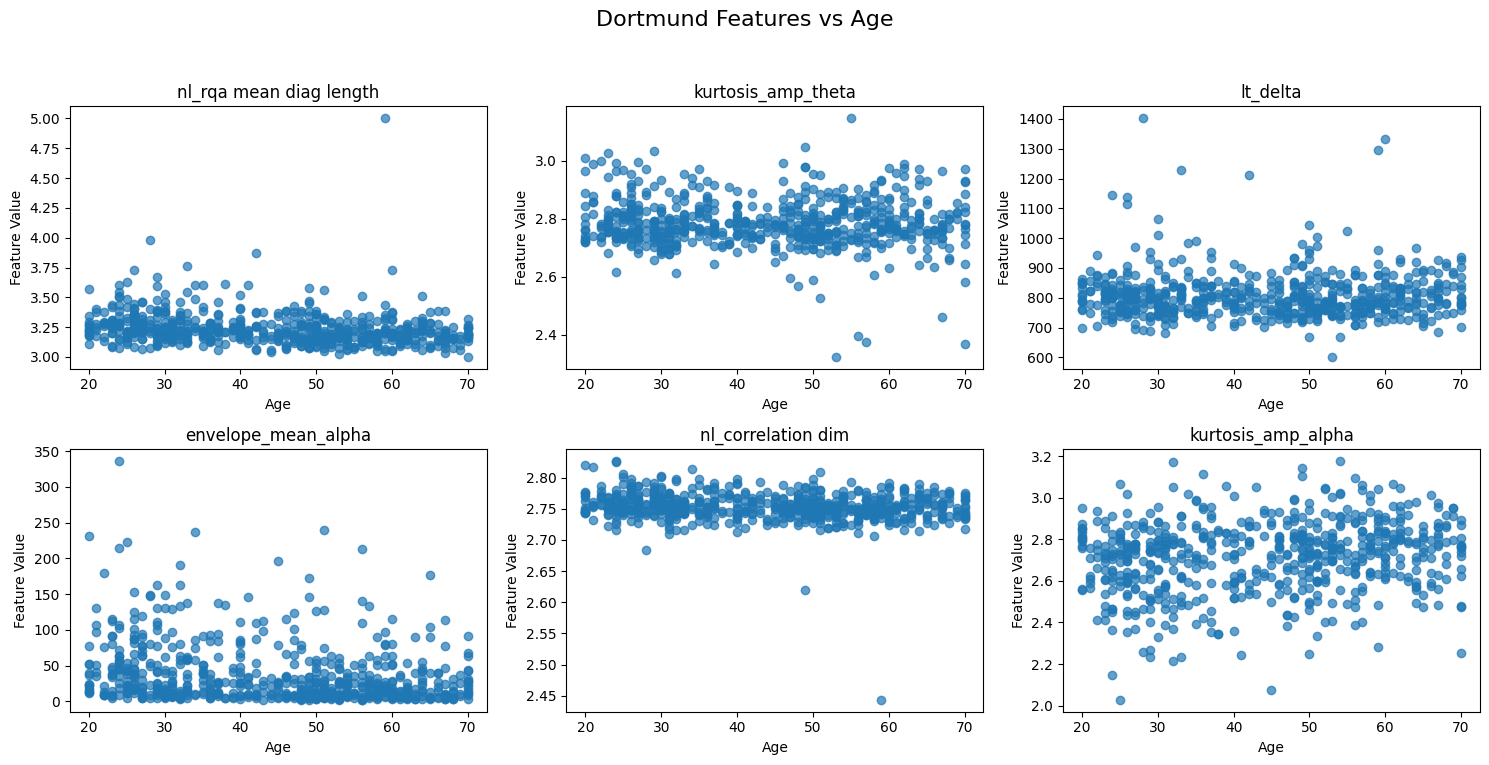

C:\Users\alewo\AppData\Local\Temp\ipykernel_22680\3406241324.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([dort_numeric.iloc[sex_dort=='F', i], dort_numeric.iloc[sex_dort=='M', i]],
C:\Users\alewo\AppData\Local\Temp\ipykernel_22680\3406241324.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([dort_numeric.iloc[sex_dort=='F', i], dort_numeric.iloc[sex_dort=='M', i]],
C:\Users\alewo\AppData\Local\Temp\ipykernel_22680\3406241324.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([dort_numeric.iloc[sex_dort=='F', i], dort_numeric.iloc[sex_dort=='M', i]],
C:\User

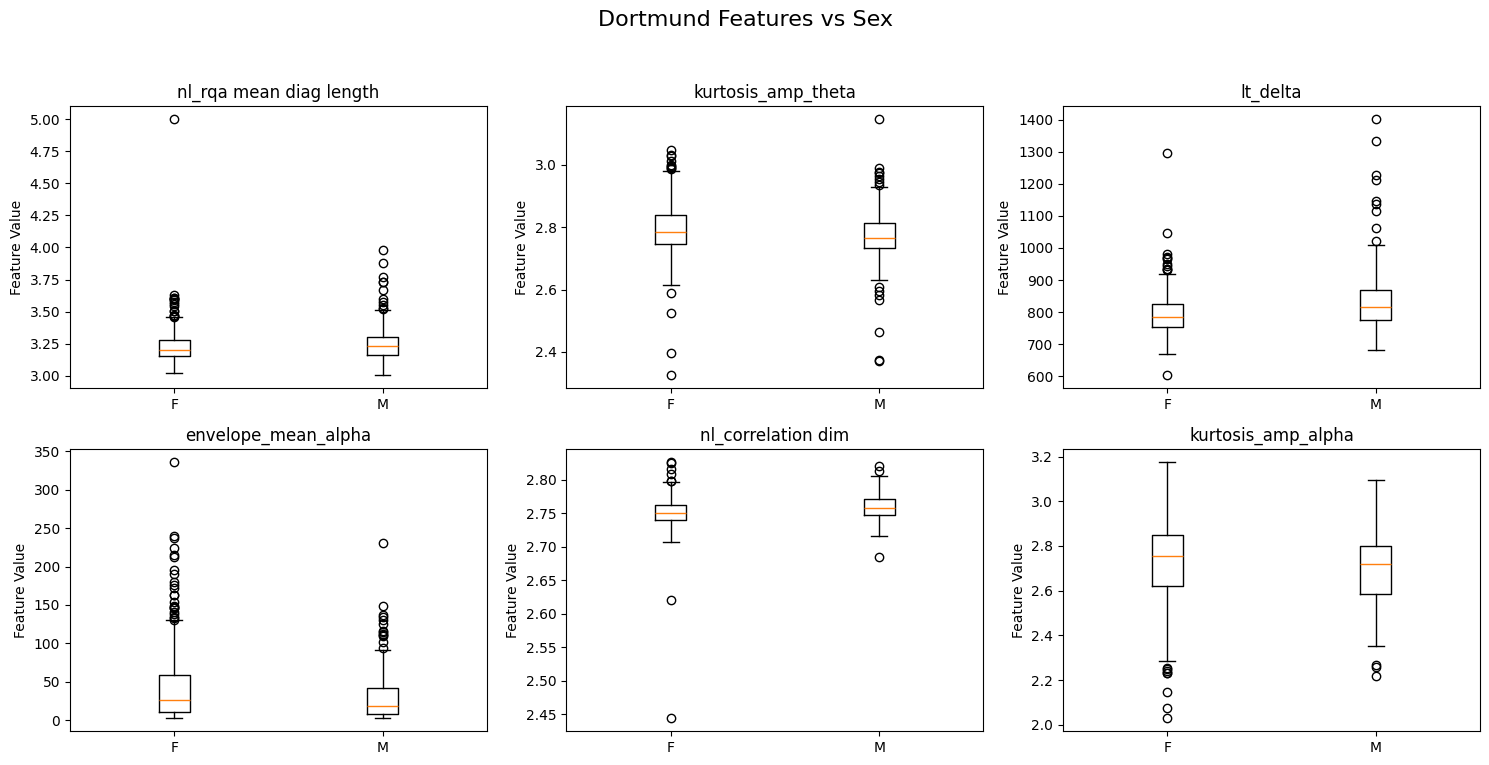

In [14]:
# Numeric Dortmund features
dort_numeric = dort.select_dtypes(include=['float64', 'int64'])
num_features_to_plot = 6

# -------------------------
# Plot features vs Age
# -------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_features_to_plot):
    axes[i].scatter(age_dort, dort_numeric.iloc[:, i], alpha=0.7)
    axes[i].set_title(dort_numeric.columns[i])
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel("Feature Value")

plt.suptitle("Dortmund Features vs Age", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# -------------------------
# Plot features vs Sex
# -------------------------
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i in range(num_features_to_plot):
    axes[i].boxplot([dort_numeric.iloc[sex_dort=='F', i], dort_numeric.iloc[sex_dort=='M', i]],
                    labels=['F','M'])
    axes[i].set_title(dort_numeric.columns[i])
    axes[i].set_ylabel("Feature Value")

plt.suptitle("Dortmund Features vs Sex", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Principal Component Analysis (PCA)
- Reduce dimensionality to 2D for visualization and higher dimensions for clustering.
- Examine explained variance and component loadings.


1. Standardize Features
- PCA is sensitive to feature scaling. We standardize all numeric features to have mean=0 and variance=1.

2.  PCA Visualization
- Scatterplot of PC1 vs PC2.
- Optionally color by age or sex if relevant.

3. PCA Component Loadings
- Shows how strongly each original feature contributes to each principal component.
- Important for interpreting which features drive variation.


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Standardize data
dort_scaled = StandardScaler().fit_transform(dort_numeric)

# Reduce to 2D for visualization
pca_2 = PCA(n_components=2) # need to work on specfiying the number of components
dort_pca_2 = pca_2.fit_transform(dort_scaled)

explained_variance=pca_2.explained_variance_ratio_ 
singular_values=pca_2.singular_values_
components=pca_2.components_

# -------------------------------------------------------
# 3. Print results clearly
# -------------------------------------------------------
print("=== PCA with 2 Components ===\n")

print("Explained Variance Ratio (lambdas):")
print(f"  PC1: {explained_variance[0]*100:.2f}%")
print(f"  PC2: {explained_variance[1]*100:.2f}%")
print(f"  Cumulative variance explained by PC1 + PC2: {explained_variance[:2].sum()*100:.2f}%\n")

print("Singular Values (gammas):")
print(singular_values, "\n")

print("Principal Components (loadings):")
print(components)

=== PCA with 2 Components ===

Explained Variance Ratio (lambdas):
  PC1: 20.95%
  PC2: 12.23%
  Cumulative variance explained by PC1 + PC2: 33.18%

Singular Values (gammas):
[135.92426733 103.85380041] 

Principal Components (loadings):
[[ 7.75521931e-02  3.16287654e-02 -2.74883914e-02  1.51070730e-01
  -1.52593018e-02 -1.22939676e-01 -1.27268145e-01  3.33170363e-02
   8.10100937e-02 -5.61925323e-02  8.81685990e-02 -1.82700971e-02
  -1.26522201e-01 -9.62971460e-02  5.07058037e-02 -1.45827841e-01
   1.20101146e-01  1.33201640e-01 -1.53603147e-01  1.09162293e-01
  -1.06800336e-01  6.22526480e-02  8.11196401e-02 -1.12181148e-01
   4.29468949e-02 -1.19586830e-01  4.92492018e-02 -1.31630578e-01
   8.85436346e-02  8.85438318e-02 -3.93527199e-02 -3.96033787e-02
   4.00838879e-03  1.37673635e-01  1.56641611e-01  7.52794674e-02
  -2.64702109e-02  1.11233079e-01 -8.72923386e-02  1.51070934e-01
  -8.07654027e-02  3.14173090e-02 -3.23306460e-02  1.22127031e-01
   8.06724647e-03  1.56380794e-02  3

### Print Data

In [16]:
# Print the results
print("=== Preview of the numeric input data (first 5 rows, first 3 columns) ===")
print(dort_numeric.iloc[:, :3].head(), "\n")

print("=== Standardized data (first 5 rows) ===")
print(pd.DataFrame(dort_scaled, columns=dort_numeric.columns).iloc[:, :3].head(), "\n")
print("  Note: After standardization, each feature has mean 0 and variance 1.\n")

print("=== PCA (components=2)-transformed data (first 5 rows) ===")
print(pd.DataFrame(dort_pca_2).head())
print("  These are the coordinates of your participants in PCA space.\n")

=== Preview of the numeric input data (first 5 rows, first 3 columns) ===
         nl_rqa mean diag length  kurtosis_amp_theta    lt_delta
sub-001                 3.167524            2.766142  763.720025
sub-002                 3.217893            2.733544  927.728906
sub-003                 3.153761            2.787347  797.812891
sub-004                 3.274557            2.734765  798.288041
sub-005                 3.264953            2.766182  932.742383 

=== Standardized data (first 5 rows) ===
   nl_rqa mean diag length  kurtosis_amp_theta  lt_delta
0                -0.487867           -0.242312 -0.564342
1                -0.134412           -0.620739  1.514138
2                -0.584445            0.003844 -0.132284
3                 0.263210           -0.606560 -0.126263
4                 0.195819           -0.241853  1.577674 

  Note: After standardization, each feature has mean 0 and variance 1.

=== PCA (components=2)-transformed data (first 5 rows) ===
          0       

#### 2. Cumulative Explained Variance Plot
- The plot shows the cumulative variance explained by the principal components.
- A vertical line marks the point where a chosen threshold of total variance (e.g., 80%) is captured.
- You can adjust the threshold or move the line along the x-axis to estimate the optimal number of principal components.

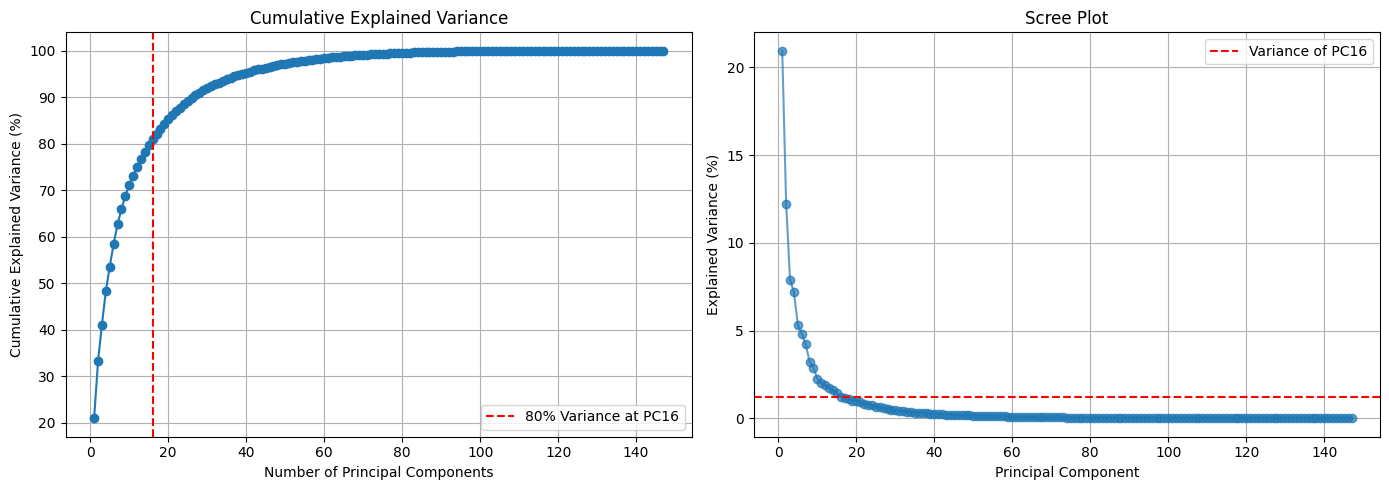

Variance explained by the first PC: 20.95%
Number of PCs needed to reach 80% variance: 16


In [17]:
# Fit PCA on standardized data (no limit on number of components now)
pca = PCA()
pca.fit_transform(dort_scaled)

# Explained variance ratio for each PC
normalised_values=pca.explained_variance_ratio_ 

# Cumulative explained variance as percentage
cumulative_sum = np.cumsum(normalised_values) * 100

# --- Automatic cutoff: number of PCs needed to reach 80% variance ---
threshold = 0.8  # 80% variance
num_pcs_threshold = np.argmax(np.cumsum(normalised_values) >= threshold) + 1

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cumulative variance plot
axes[0].plot(range(1, len(normalised_values)+1), cumulative_sum, marker='o', linestyle='-')
axes[0].axvline(x=num_pcs_threshold, color='r', linestyle='--', 
                label=f'80% Variance at PC{num_pcs_threshold}')
axes[0].set_xlabel("Number of Principal Components")
axes[0].set_ylabel("Cumulative Explained Variance (%)")
axes[0].set_title("Cumulative Explained Variance")
axes[0].grid(True)
axes[0].legend()

# Scree plot: variance explained by each PC
axes[1].plot(range(1, len(normalised_values)+1), normalised_values*100, marker='o', linestyle='-', alpha=0.7)
axes[1].axhline(y=normalised_values[num_pcs_threshold-1]*100, color='r', linestyle='--',
                label=f'Variance of PC{num_pcs_threshold}')
axes[1].legend()
axes[1].set_xlabel("Principal Component")
axes[1].set_ylabel("Explained Variance (%)")
axes[1].set_title("Scree Plot")
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Print the variance explained by the first principal component
print(f"Variance explained by the first PC: {normalised_values[0]*100:.2f}%")
print(f"Number of PCs needed to reach 80% variance: {num_pcs_threshold}")

#### PCA With Optimal (n=16)

In [18]:
pca_optimal = PCA(n_components=16)
dort_pca_optimal = pca_optimal.fit_transform(dort_scaled)

print("=== Feature Space Size ===")
print(f"Original features: {dort.shape}")
print(f"PCA-reduced features: {dort_pca_optimal.shape}\n")

explained_variance_optimal = pca_optimal.explained_variance_ratio_
singular_values_optimal=pca_optimal.singular_values_
components_optimal = pca_optimal.components_

# Explained variance
print("=== Explained Variance Ratio (Each PC) ===")
for i, var in enumerate(explained_variance_optimal, start=1):
    print(f"PC{i}: {var*100:.2f}%")
print(f"Cumulative variance explained by first 2 PCs: {explained_variance_optimal[:2].sum()*100:.2f}%\n")

# Singular values
print("=== Singular Values (first 5) ===")
print(singular_values_optimal[:5], "\n")

# PCA Components (show first 3 features per PC for brevity)
print("=== PCA Components Loadings (first 3 features per PC) ===")
for i, pc in enumerate(components_optimal, start=1):
    print(f"PC{i}: {pc[:3]}")

=== Feature Space Size ===
Original features: (600, 147)
PCA-reduced features: (600, 16)

=== Explained Variance Ratio (Each PC) ===
PC1: 20.95%
PC2: 12.23%
PC3: 7.91%
PC4: 7.18%
PC5: 5.32%
PC6: 4.83%
PC7: 4.24%
PC8: 3.23%
PC9: 2.90%
PC10: 2.26%
PC11: 2.02%
PC12: 1.89%
PC13: 1.76%
PC14: 1.61%
PC15: 1.43%
PC16: 1.22%
Cumulative variance explained by first 2 PCs: 33.18%

=== Singular Values (first 5) ===
[135.92426733 103.85380041  83.50298096  79.57932544  68.48214753] 

=== PCA Components Loadings (first 3 features per PC) ===
PC1: [ 0.07755219  0.03162875 -0.02748839]
PC2: [-0.17531187 -0.01302011 -0.1249459 ]
PC3: [-0.05803041 -0.06893897 -0.13057845]
PC4: [-0.0128845   0.02623612 -0.09575225]
PC5: [ 0.06349991 -0.12897552 -0.02706642]
PC6: [0.03376841 0.0140864  0.08135584]
PC7: [0.08087156 0.08480131 0.0442917 ]
PC8: [-0.07384773  0.09190241 -0.09995532]
PC9: [0.00617645 0.06777915 0.07688419]
PC10: [-0.02054528 -0.11715235 -0.0364919 ]
PC11: [0.00488829 0.23523473 0.10403962]
PC12

## EXPORT DATA AS CSV FILES

In [19]:
# --- PCA Components (Loadings) ---
# Rows = PCs, Columns = original features
# This shows HOW MUCH each original feature contributes to each PC
components_df = pd.DataFrame(
    components_optimal,
    columns=dort_numeric.columns
)
components_df.index = [f'PC{i+1}' for i in range(components_df.shape[0])]
components_df.to_csv("dataset/dortmund_pca_loadings.csv", index=True)
print("✓ PCA loadings exported to dataset/dortmund_pca_loadings.csv")

# --- PCA Transformed Data ---
# Rows = Subjects, Columns = PCs
# This is what you use for CLUSTERING
transformed_df = pd.DataFrame(
    dort_pca_optimal,
    index=dort.index,  # Keep original subject IDs!
    columns=[f'PC{i+1}' for i in range(dort_pca_optimal.shape[1])]
)
transformed_df.to_csv("dataset/dortmund_pca_transformed.csv", index=True)
print("✓ PCA transformed data exported to dataset/dortmund_pca_transformed.csv")
print(f"  Subject IDs preserved: {transformed_df.index[:3].tolist()}... (first 3)")

✓ PCA loadings exported to dataset/dortmund_pca_loadings.csv
✓ PCA transformed data exported to dataset/dortmund_pca_transformed.csv
  Subject IDs preserved: ['sub-001', 'sub-002', 'sub-003']... (first 3)


## IGNORE

Just curious if there was any meaning to age - OBVIOUSLY NOPE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# DO r2 score for and training data and Linear regression
model = LinearRegression()
model.fit(dort_pca_optimal, age_dort)

# R^2 on the training data
R2_train = model.score(dort_pca_optimal, age_dort)

# Cross-validated R^2 (5-fold CV)
cv_R2 = cross_val_score(model, dort_pca_optimal, age_dort, cv=5).mean()

print("=== Linear Regression Performance on Age (Using PCA Features) ===")
print(f"Number of PCA features used: {dort_pca_optimal.shape[1]}")
print(f"R^2 vs age data: {R2_train:.3f}")
print(f"5-fold cross-validated R^2: {cv_R2:.3f}")

=== Linear Regression Performance on Age (Using PCA Features) ===
Number of PCA features used: 16
R^2 vs age data: 0.351
5-fold cross-validated R^2: 0.288
